# Read flatclust clusters and masks
- clu files: clu_Cxx.txt (xx is syllable number +1; 11 is introductory note)
- masks file: masks.mat

In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [5]:
meta_path = os.path.abspath('/mnt/microdrive/birds/b11k10/MetaData/2019-06-12-7061')

masks_file = 'masks.mat'




#### Read masks

In [23]:
# read the matlab file
masks_f_path = os.path.join(meta_path, masks_file)
masks_mat = sio.loadmat(masks_f_path)
masks_df = pd.DataFrame({'file': masks_mat['files'].flatten(), 
                         'masks': masks_mat['masks'].flatten(),
                        'song': masks_mat['song'].flatten()})
# clean up files field
masks_df['file'] = masks_df['file'].apply(lambda x: np.array2string(x.squeeze()).strip('\'').split('.')[0])

#clean up masks arrays
masks_df['masks'] = masks_df['masks'].apply(np.squeeze)
masks_df.head()

,file,masks,song
0,b11k10D-f00009,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[28972], [45618]]"
1,b11k10D-f00052,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[[]]
2,b11k10D-f00061,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[[]]
3,b11k10D-f00076,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[[]]
4,b11k10D-f00077,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[29185], [70501]]"


In [28]:
a_mask, a_song = tuple([masks_df.loc[22]['masks'], masks_df.loc[22]['song']])

In [32]:
a_song

array([[ 23825, 222624, 373528],
       [124495, 349268, 467359]], dtype=int32)

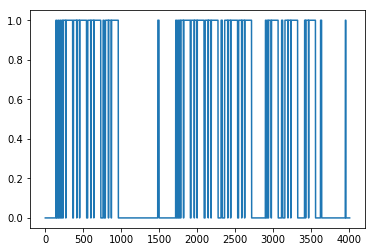

In [31]:
plt.plot(a_mask)


### Read clusters

In [10]:
# read the clusters file
def read_clu_file(meta_path, clu, prefix='song'):
    clu_file = '{}_C{}.txt'.format(prefix, clu)
    clu_pd = pd.read_csv(os.path.join(meta_path, clu_file), sep='\t')
    clu_pd['filename'] = clu_pd['filename'].apply(lambda x: x.split('.')[0])
    clu_pd['clu'] = clu
    return clu_pd

clu_list = [2, 11]
clu_pd = pd.concat([read_clu_file(meta_path, clu) for clu in clu_list])

In [11]:
clu_pd.head()

,filename,segon,segoff,clu
0,b11k10D-f01765,50653,3699,2
1,b11k10D-f01587,88946,4664,2
2,b11k10D-f01947,29800,4567,2
3,b11k10D-f00154,88074,3892,2
4,b11k10D-f02286,30732,3942,2


### get bouts

In [ ]:
# use the 